# PIPELINE

#### - Импорт всех необходимых библиотек для анализа данных, визуализации, машинного обучения и глубокого обучения.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from scipy import stats
from pathlib import Path

# Plotly imports
import plotly.graph_objs as go
import plotly.express as px

# Scikit-learn imports
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans  # Основной алгоритм кластеризации
from sklearn.preprocessing import StandardScaler  # Для масштабирования данных
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import (mean_absolute_error, 
                        mean_absolute_percentage_error, 
                        mean_squared_error, silhouette_score, 
                        r2_score)

# Keras/TensorFlow imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, callbacks
from keras_tuner import HyperParameters, RandomSearch, Hyperband

#### - Загрузка данных из Excel-файла с указанием типа данных для колонки 'Угол нашивки, град' и установкой 'ID' как индекса. Вывод формы (размерности) DataFrame.

In [2]:
X_full = pd.read_excel('CompDataSet.xlsx', dtype={'Угол нашивки, град': float}, index_col='ID')

X_full.shape

(1023, 13)

## Анализ данных

#### - Вывод названий всех колонок в DataFrame.

In [3]:
print(X_full.columns)

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')


#### - Просмотр случайной выборки из 10 строк данных.

In [4]:
X_full.sample(10)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
ID                                                                              
133                         3.953978       2056.299072            1428.382367   
735                         1.397467       2005.502050             755.383225   
681                         3.888005       2150.337595             856.628236   
30                          1.978140       1973.629097             991.724095   
88                          3.319423       2075.221203              78.914324   
661                         3.995267       2002.148884             460.017684   
389                         2.503263       1949.509055             670.879922   
782                         3.090260       1837.252105             836.118000   
219                         2.367495       1926.596503             932.803560   
86                          1.044361       1948.395238            1072.010396   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
ID                                                                  
133                    45.122175                        24.830065   
735                    88.536497                        23.864561   
681                   154.920031                        23.276208   
30                    149.372128                        19.750578   
88                    140.938972                        24.370475   
661                   134.659526                        25.944806   
389                   113.553444                        24.283081   
782                   156.056044                        21.926481   
219                    86.777652                        24.810188   
86                    126.027685                        21.344915   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
ID                                                             
133                319.150465                     558.300421   
735                245.543354                     264.281505   
681                236.284743                     401.759337   
30                 232.058191                     485.453778   
88                 261.486932                    1013.029606   
661                311.241769                     720.227398   
389                266.906499                     926.915589   
782                373.593271                     734.144740   
219                272.239213                     267.140817   
86                 356.530712                     221.233654   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
ID                                                                         
133                             69.016483                    2574.676221   
735                             80.691499                    2404.068921   
681                             70.425336                    2181.808988   
30                              75.665701                    2448.943079   
88                              74.273549                    2044.043573   
661                             72.614608                    2134.806771   
389                             74.193796                    1938.360881   
782                             69.248476                    2301.866578   
219                             74.868684                    2883.636497   
86                              69.345373                    2436.691508   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
ID                                                              
133               224.098203                 0.0     4.607330   
735               184.661639                90.0     4.385964   
681               227.620627                90.0     5.984565   
30                162.493694                90.0     7.000000   
88                301.765754                 0.0     9.025120   
661               221.477548                90.0     4.603716   
3

#### - Настройка отображения всех строк при выводе. Подсчет пропущенных значений в каждой колонке.

In [5]:
pd.set_option('display.max_rows', None)

X_full.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

#### - Просмотр случайной выборки из 10 строк для проверки пропущенных значений.

In [6]:
X_full.isnull().sample(10)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
ID                                                                              
46                             False             False                  False   
497                            False             False                  False   
86                             False             False                  False   
271                            False             False                  False   
464                            False             False                  False   
437                            False             False                  False   
210                            False             False                  False   
890                            False             False                  False   
849                            False             False                  False   
448                            False             False                  False   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
ID                                                                  
46                         False                            False   
497                        False                            False   
86                         False                            False   
271                        False                            False   
464                        False                            False   
437                        False                            False   
210                        False                            False   
890                        False                            False   
849                        False                            False   
448                        False                            False   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
ID                                                             
46                      False                          False   
497                     False                          False   
86                      False                          False   
271                     False                          False   
464                     False                          False   
437                     False                          False   
210                     False                          False   
890                     False                          False   
849                     False                          False   
448                     False                          False   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
ID                                                                         
46                                  False                          False   
497                                 False                          False   
86                                  False                          False   
271                                 False                          False   
464                                 False                          False   
437                                 False                          False   
210                                 False                          False   
890                                 False                          False   
849                                 False                          False   
448                                 False                          False   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
ID                                                              
46                     False               False        False   
497                    False               False        False   
86                     False               False        False   
271                    False               False        False   
464                    False               False        False   
437                    False               False        False   
2

#### - Вывод общей информации о DataFrame (типы данных, использование памяти и т.д.).

In [7]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки           

In [8]:
X_full.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

#### - Построение интерактивных гистограмм для каждой колонки с настройкой оформления.

In [9]:
for col in X_full.columns: 
    fig = px.histogram(X_full, x=col, text_auto=True)
    fig.update_layout(title_text=f'Гистограмма для параметра: {col}',  
                        yaxis_title_text='Count', 
                        xaxis_title_text=f'{col}',
                        bargap=0.2, 
                        bargroupgap=0.1,
                        template="plotly_dark"
    )
    fig.show()

#### - Вычисление максимальных значений для каждой колонки.

In [10]:
max_column=X_full.max(axis=0).values[:]
max_column

array([   5.5917416 , 2207.77348061, 1911.536477  ,  198.95320719,
         33.        ,  413.27341824, 1399.54236234,   82.68205104,
       3848.43673188,  414.59062836,   90.        ,   14.44052188,
        103.9889013 ])

#### - Визуализация максимальных значений на интерактивном графике.

In [11]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X_full.columns, y=max_column))
fig.show()

#### - Вычисление средних значений для каждой колонки.

In [12]:
mean_column=X_full.mean(axis=0).values[:]
mean_column

array([   2.93036577, 1975.73488811,  739.92323276,  110.57076865,
         22.24438955,  285.88215135,  482.73183304,   73.32857125,
       2466.9228427 ,  218.42314368,   44.25219941,    6.89922208,
         57.15392943])

#### - Визуализация средних значений на интерактивном графике.

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X_full.columns, y=mean_column))
fig.show()

## Корреляция

#### - Расчет матрицы корреляций и визуализация в виде тепловой карты.

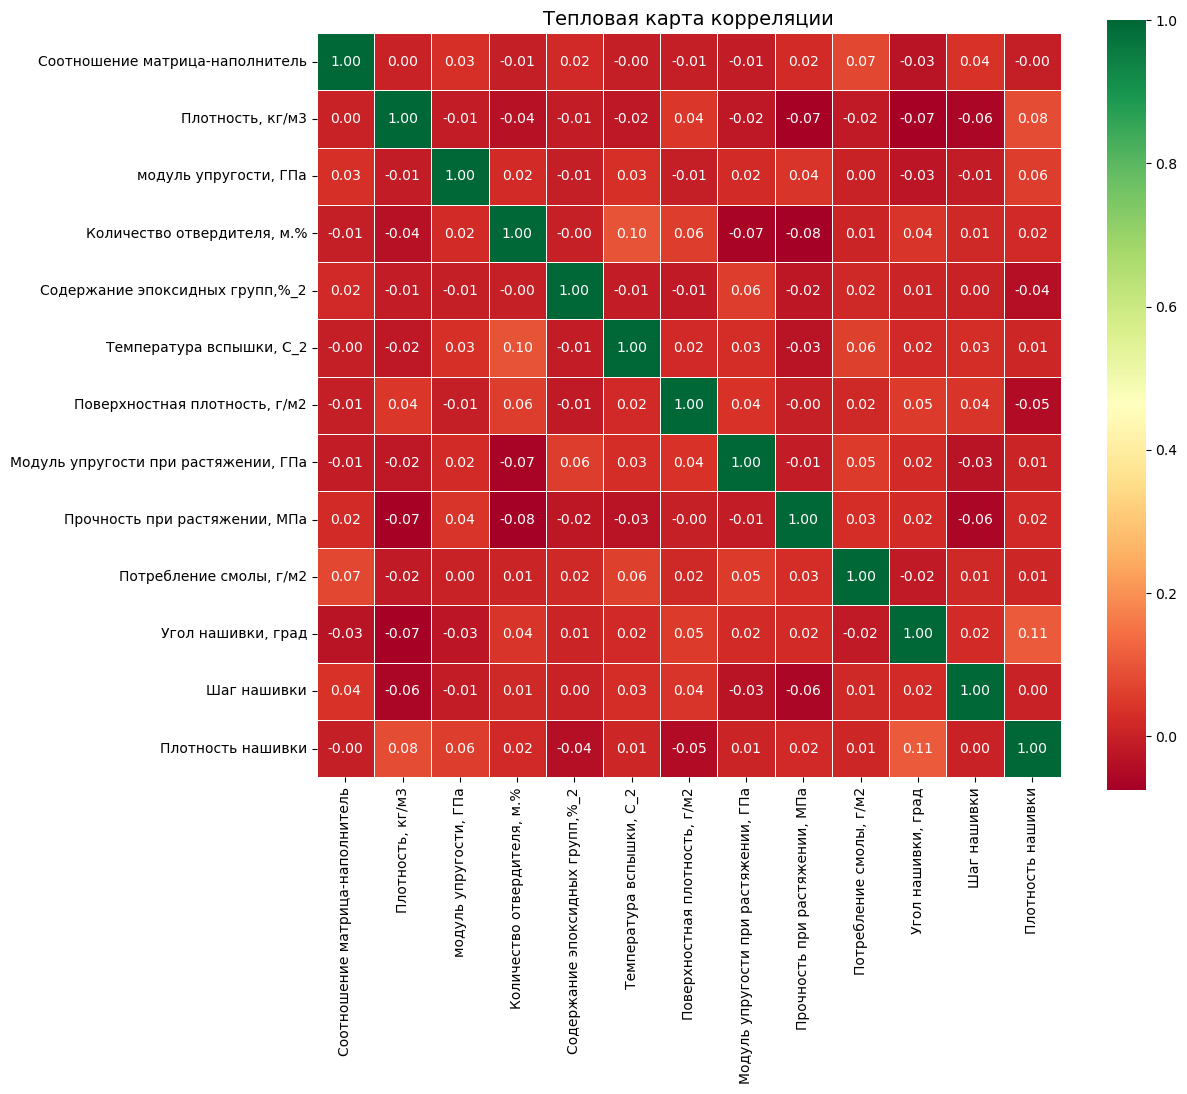

In [14]:
# Расчет корреляции
corr = X_full.corr()

# Построение тепловой карты
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="RdYlGn",
    linewidths=0.5,
    square=True
)
plt.title("Тепловая карта корреляции", fontsize=14)
plt.show()

#### - Построение попарных графиков зависимостей между переменными.

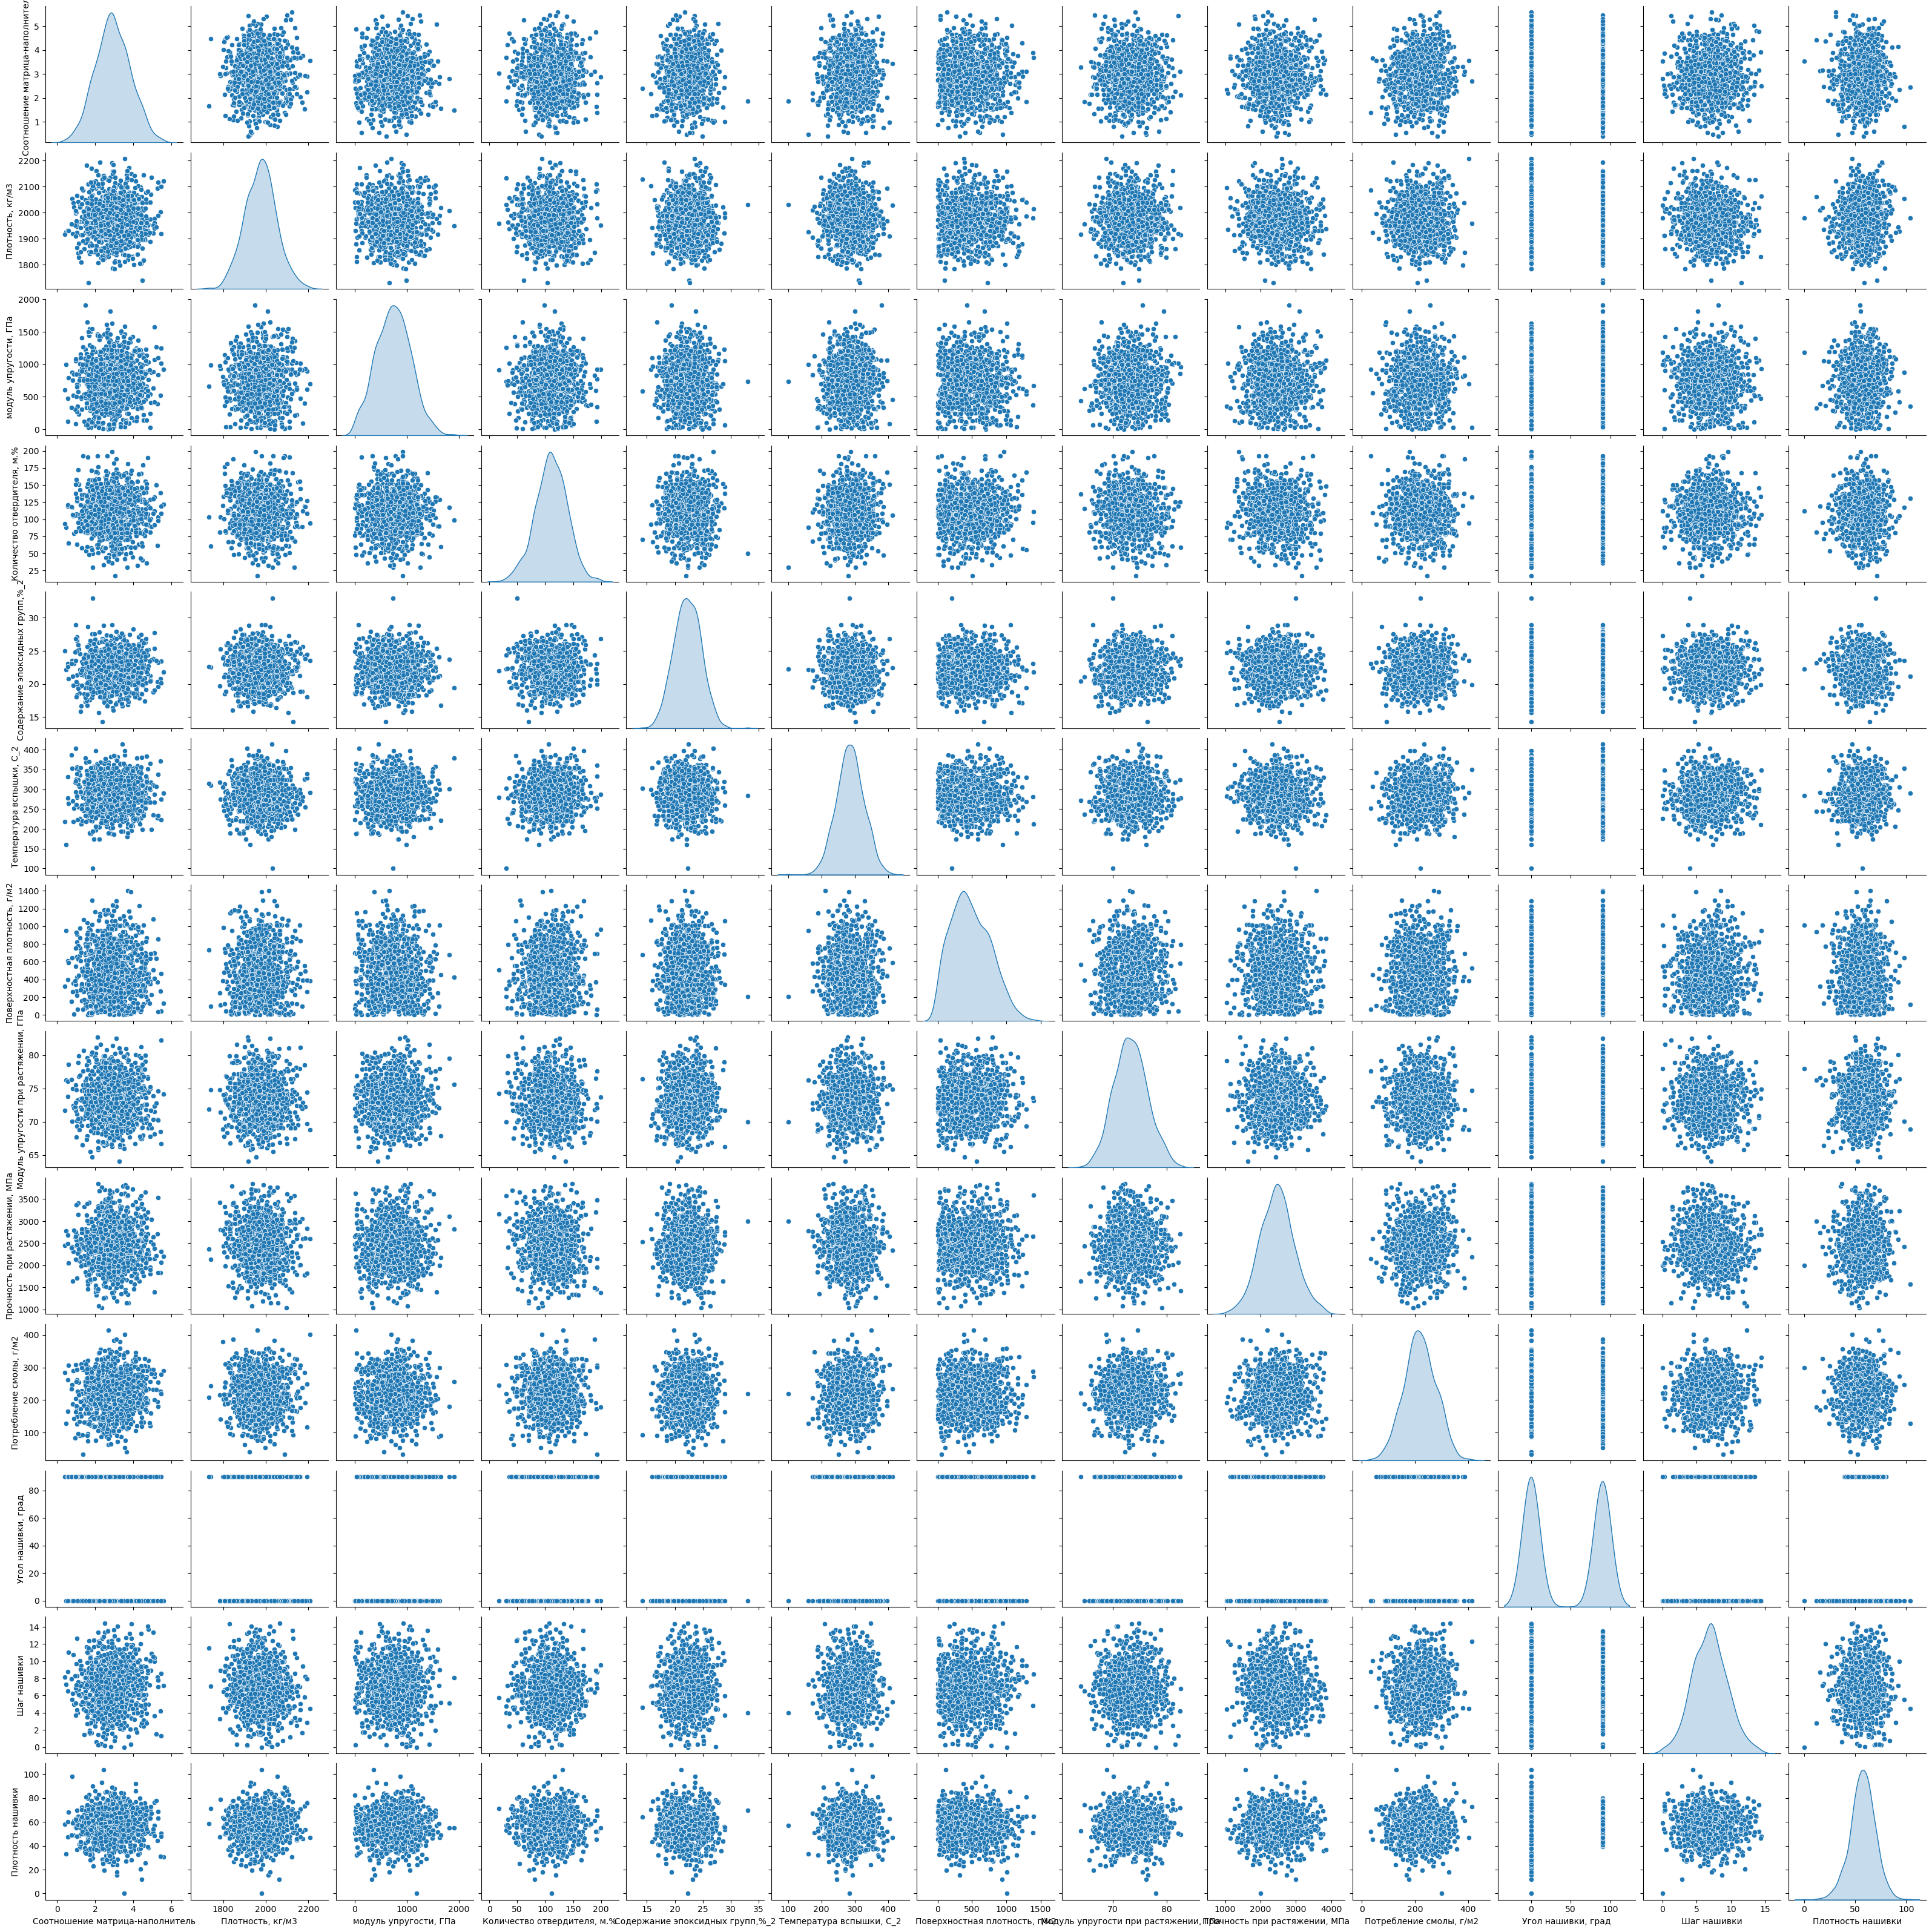

In [15]:
sns.pairplot(X_full, diag_kind='kde')
plt.show()

#### - Расчет корреляций Пирсона.

In [16]:
X_full.corr(method ='pearson')

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.003841   
модуль упругости, ГПа                                        0.031700   
Количество отвердителя, м.%                                 -0.006445   
Содержание эпоксидных групп,%_2                              0.019766   
Температура вспышки, С_2                                    -0.004776   
Поверхностная плотность, г/м2                               -0.006272   
Модуль упругости при растяжении, ГПа                        -0.008411   
Прочность при растяжении, МПа                                0.024148   
Потребление смолы, г/м2                                      0.072531   
Угол нашивки, град                                          -0.031073   
Шаг нашивки                                                  0.036437   
Плотность нашивки                                           -0.004652   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель               0.003841               0.031700   
Плотность, кг/м3                              1.000000              -0.009647   
модуль упругости, ГПа                        -0.009647               1.000000   
Количество отвердителя, м.%                  -0.035911               0.024049   
Содержание эпоксидных групп,%_2              -0.008278              -0.006804   
Температура вспышки, С_2                     -0.020695               0.031174   
Поверхностная плотность, г/м2                 0.044930              -0.005306   
Модуль упругости при растяжении, ГПа         -0.017602               0.023267   
Прочность при растяжении, МПа                -0.069981               0.041868   
Потребление смолы, г/м2                      -0.015937               0.001840   
Угол нашивки, град                           -0.068474              -0.025417   
Шаг нашивки                                  -0.061015              -0.009875   
Плотность нашивки                             0.080304               0.056346   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                         -0.006445   
Плотность, кг/м3                                        -0.035911   
модуль упругости, ГПа                                    0.024049   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                         -0.000684   
Температура вспышки, С_2                                 0.095193   
Поверхностная плотность, г/м2                            0.055198   
Модуль упругости при растяжении, ГПа                    -0.065929   
Прочность при растяжении, МПа                           -0.075375   
Потребление смолы, г/м2                                  0.007446   
Угол нашивки, град                                       0.038570   
Шаг нашивки                                              0.014887   
Плотность нашивки                                        0.017248   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.019766   
Плотность, кг/м3                                            -0.008278   
модуль упругости, ГПа                                       -0.006804   
Количество отвердителя, м.%                                 -0.000684   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                    -0.009769   
Поверхностная плотность, г/м2                               -0.012940   
Модуль упругости при растяжении, ГПа                         0.056828   
Прочность при растяжении, МПа                               -0.023899   
Потребление смолы, г/м2                                      0.015165   
Угол нашивки, град                                           0.008052   
Шаг нашивки                          

#### - Расчет корреляций Кендалла.

In [17]:
X_full.corr(method ='kendall')

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                            -0.003135   
модуль упругости, ГПа                                        0.021247   
Количество отвердителя, м.%                                  0.001410   
Содержание эпоксидных групп,%_2                              0.010180   
Температура вспышки, С_2                                    -0.009480   
Поверхностная плотность, г/м2                               -0.002060   
Модуль упругости при растяжении, ГПа                        -0.004157   
Прочность при растяжении, МПа                                0.011614   
Потребление смолы, г/м2                                      0.035145   
Угол нашивки, град                                          -0.021395   
Шаг нашивки                                                  0.022723   
Плотность нашивки                                            0.002788   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель              -0.003135               0.021247   
Плотность, кг/м3                              1.000000              -0.008059   
модуль упругости, ГПа                        -0.008059               1.000000   
Количество отвердителя, м.%                  -0.021963               0.022382   
Содержание эпоксидных групп,%_2              -0.007758               0.002351   
Температура вспышки, С_2                     -0.019947               0.021028   
Поверхностная плотность, г/м2                 0.037302              -0.000442   
Модуль упругости при растяжении, ГПа         -0.021151               0.005458   
Прочность при растяжении, МПа                -0.047426               0.022959   
Потребление смолы, г/м2                      -0.017079               0.005169   
Угол нашивки, град                           -0.051525              -0.031695   
Шаг нашивки                                  -0.031220              -0.008305   
Плотность нашивки                             0.052935               0.049347   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                          0.001410   
Плотность, кг/м3                                        -0.021963   
модуль упругости, ГПа                                    0.022382   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                          0.000010   
Температура вспышки, С_2                                 0.059034   
Поверхностная плотность, г/м2                            0.033110   
Модуль упругости при растяжении, ГПа                    -0.043140   
Прочность при растяжении, МПа                           -0.046507   
Потребление смолы, г/м2                                 -0.003677   
Угол нашивки, град                                       0.024690   
Шаг нашивки                                              0.006232   
Плотность нашивки                                        0.016607   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.010180   
Плотность, кг/м3                                            -0.007758   
модуль упругости, ГПа                                        0.002351   
Количество отвердителя, м.%                                  0.000010   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                    -0.002170   
Поверхностная плотность, г/м2                               -0.006859   
Модуль упругости при растяжении, ГПа                         0.041994   
Прочность при растяжении, МПа                               -0.013441   
Потребление смолы, г/м2                                      0.009756   
Угол нашивки, град                                           0.004668   
Шаг нашивки                          

## Выбросы

#### - Создание глубокой копии DataFrame для работы с выбросами.

In [18]:
xfl = X_full.copy(deep = True)

#### - Функция для поиска выбросов по методу межквартильного размаха (IQR).

#### - Применение функции и вывод количества выбросов по каждой колонке.

In [19]:
def find_outliers_iqr(data):
    outliers = pd.DataFrame()
    for col in data.select_dtypes(include=['number']): 
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers[col] = ~data[col].between(lower, upper) 
    return outliers

outliers_iqr = find_outliers_iqr(xfl)
print("Выбросы по IQR:")
print(outliers_iqr.sum())  

Выбросы по IQR:
Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64


#### - Визуализация выбросов с помощью boxplot для всех числовых колонок.

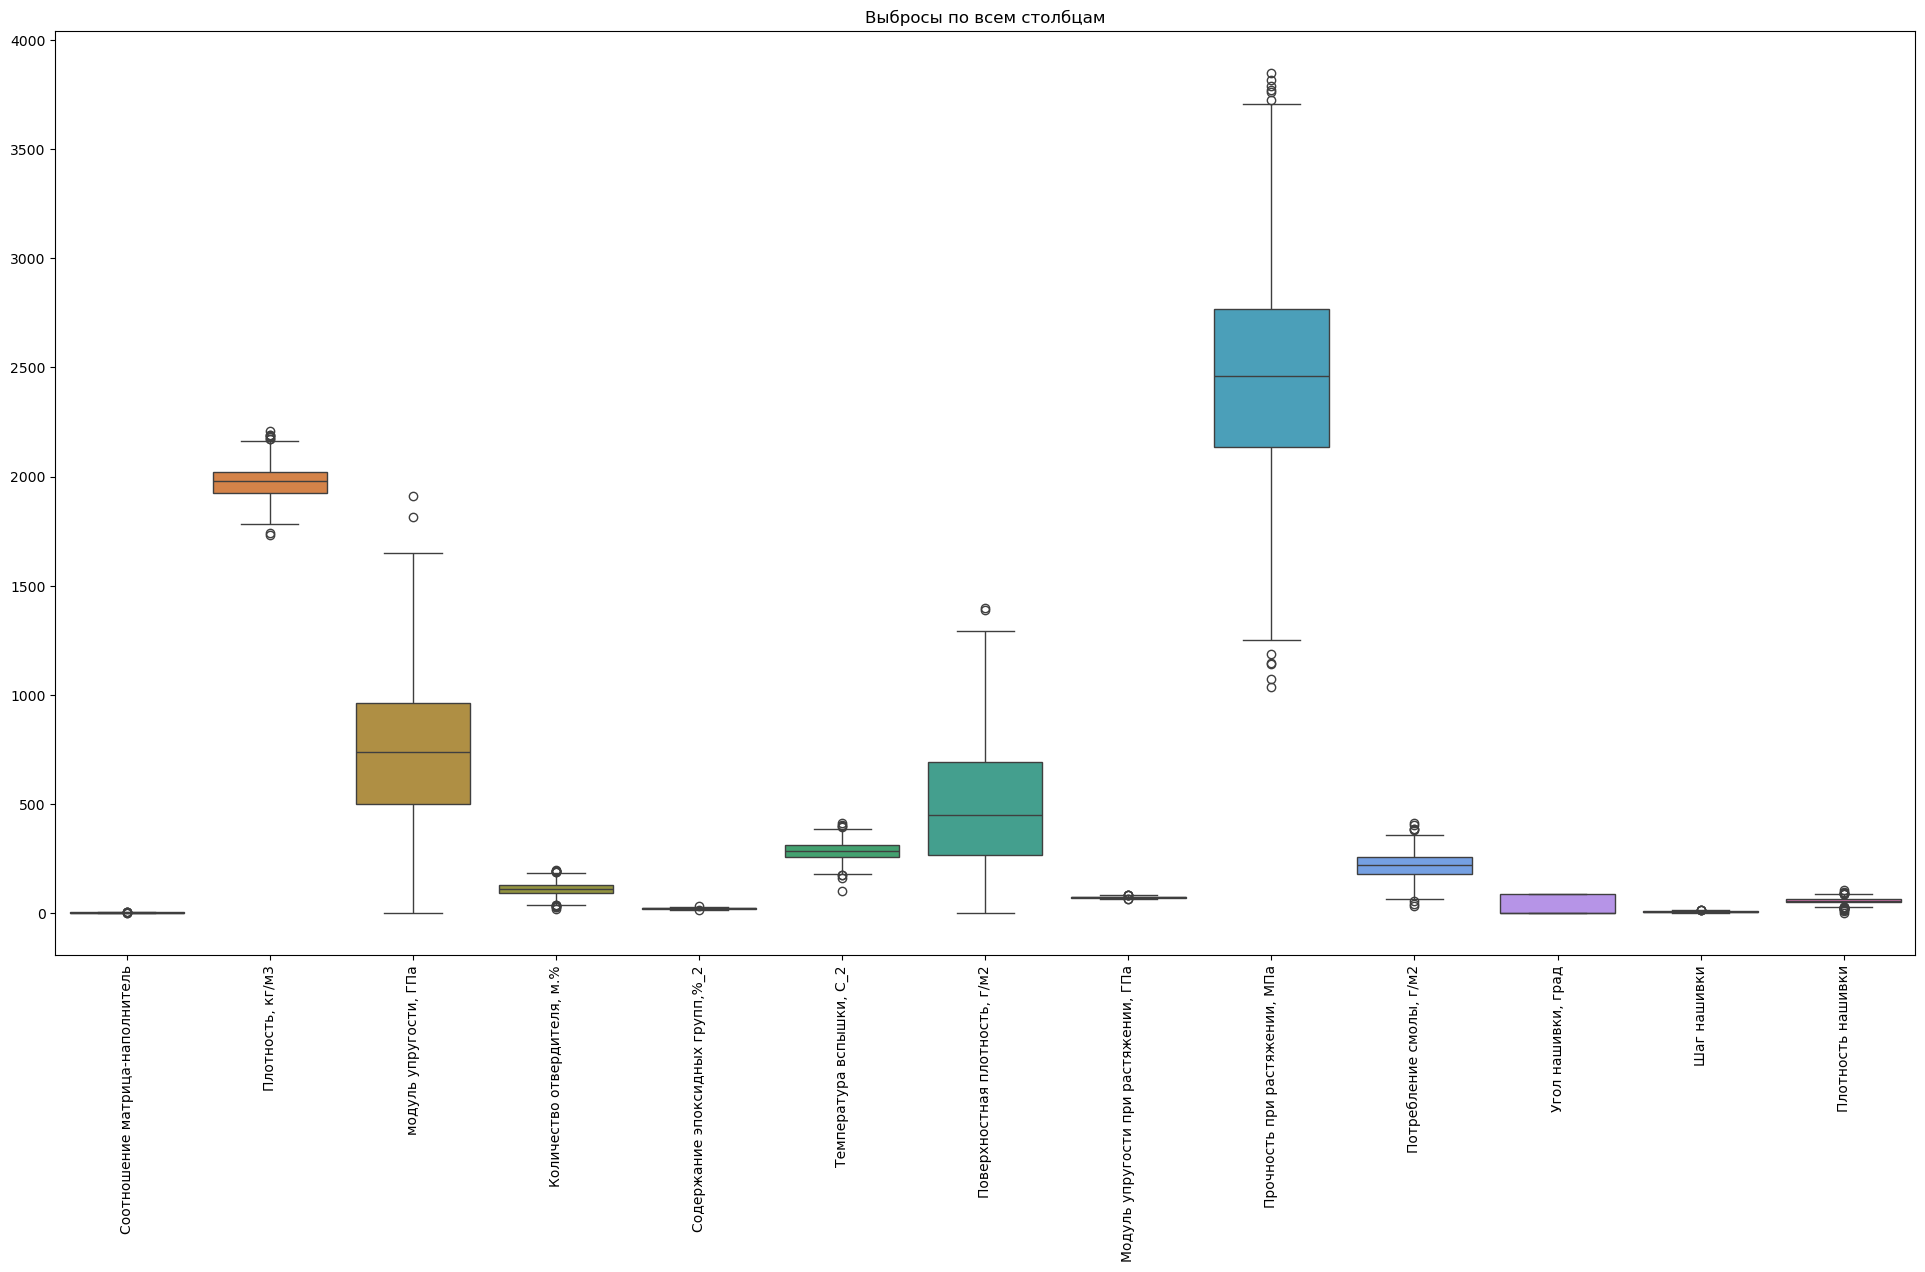

In [20]:
plt.figure(figsize=(24, 12))
sns.boxplot(data=xfl.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.title("Выбросы по всем столбцам")
plt.show()

#### - Функция для замены строк с выбросами средним значением по методу IQR. Применение функции к данным и вывод статистики по удаленным строкам.

Обработка выбросов по IQR с заменой на среднее:
Столбец Соотношение матрица-наполнитель:
  Границы: [0.47, 5.40]
  Заменено 6 выбросов на среднее 2.93
Столбец Плотность, кг/м3:
  Границы: [1778.33, 2167.20]
  Заменено 9 выбросов на среднее 1974.76
Столбец модуль упругости, ГПа:
  Границы: [-192.60, 1654.46]
  Заменено 2 выбросов на среднее 737.72
Столбец Количество отвердителя, м.%:
  Границы: [36.51, 185.66]
  Заменено 14 выбросов на среднее 110.56
Столбец Содержание эпоксидных групп,%_2:
  Границы: [15.58, 28.99]
  Заменено 2 выбросов на среднее 22.24
Столбец Температура вспышки, С_2:
  Границы: [178.16, 393.91]
  Заменено 8 выбросов на среднее 285.95
Столбец Поверхностная плотность, г/м2:
  Границы: [-372.80, 1332.84]
  Заменено 2 выбросов на среднее 480.94
Столбец Модуль упругости при растяжении, ГПа:
  Границы: [65.08, 81.52]
  Заменено 6 выбросов на среднее 73.31
Столбец Прочность при растяжении, МПа:
  Границы: [1188.84, 3714.21]
  Заменено 11 выбросов на среднее 2465.77
Столбец

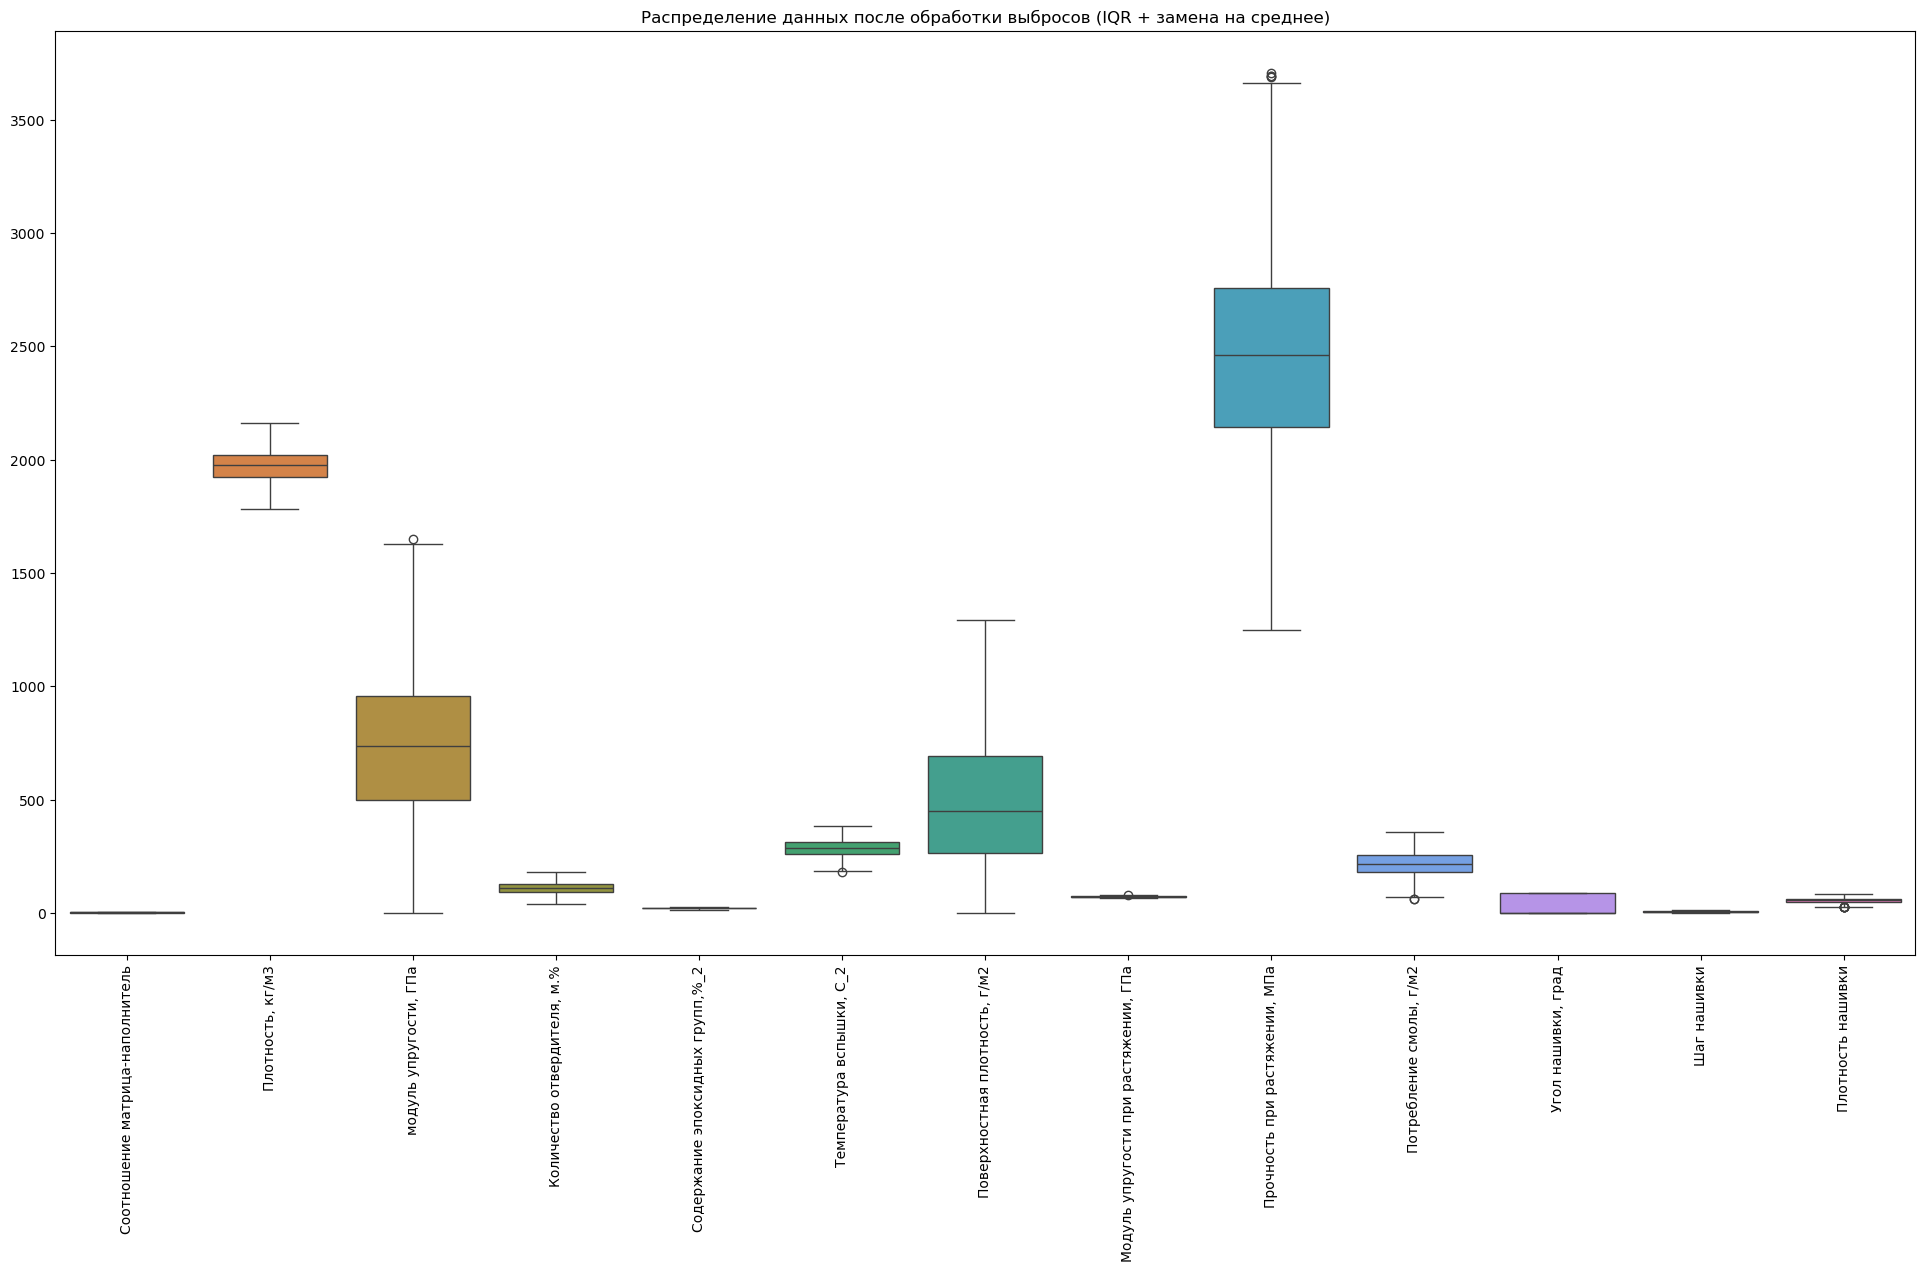


Статистика после обработки:
       Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.925257       1974.755152   
std                           0.892295         70.842554   
min                           0.547391       1784.482245   
25%                           2.321061       1924.535020   
50%                           2.908835       1977.112680   
75%                           3.548775       2020.628746   
max                           5.314144       2161.565216   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              737.721905                   110.558048   
std               326.453972                    26.661661   
min                 2.436909                    38.668500   
25%               500.047452                    92.883002   
50%               738.736842                   110.558048   
75%

In [21]:
def replace_outliers_iqr_with_mean(data):
    data_clean = data.copy()
    
    for col in data.select_dtypes(include=['number']):
        # Вычисляем квартили и IQR
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Определяем границы
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Вычисляем среднее значение без учета выбросов
        mean_val = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)][col].mean()
        
        # Заменяем выбросы на среднее значение
        data_clean[col] = np.where(
            (data[col] < lower_bound) | (data[col] > upper_bound),
            mean_val,
            data[col]
        )
        
        # Подсчитываем количество замененных значений
        n_outliers = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
        
        if n_outliers > 0:
            print(f"Столбец {col}:")
            print(f"  Границы: [{lower_bound:.2f}, {upper_bound:.2f}]")
            print(f"  Заменено {n_outliers} выбросов на среднее {mean_val:.2f}")
    
    return data_clean

# Применяем обработку выбросов по IQR с заменой на среднее
print("Обработка выбросов по IQR с заменой на среднее:")
df_clean = replace_outliers_iqr_with_mean(xfl)

# Визуализируем результат
plt.figure(figsize=(24, 12))
sns.boxplot(data=df_clean.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.title("Распределение данных после обработки выбросов (IQR + замена на среднее)")
plt.show()

# Проверяем статистику после обработки
print("\nСтатистика после обработки:")
print(df_clean.describe())

#### - Расчет доли пропущенных значений (выбросов) в каждой колонке с визуализацией в виде bar chart.

In [22]:
(xfl.isnull().mean()).rename('доля выбросов').to_frame().style.bar(vmax=1, vmin=0).format('{:.2%}')

## Кластеризация

#### - Кластеризация методом K-means с определением оптимального числа кластеров по методу локтя.

#### - Визуализация метода локтя.

#### - Обучение K-means с оптимальным числом кластеров.

#### - Оценка качества кластеризации с помощью silhouette score.

#### - Анализ средних значений по кластерам.

c:\Users\KABAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\KABAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\KABAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\KABAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

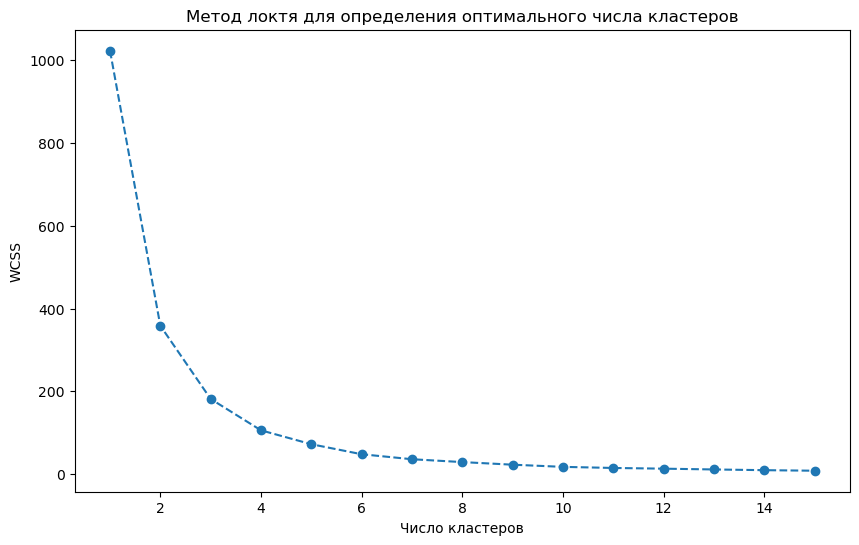

Средний коэффициент силуэта: 0.546

Средние значения по кластерам:
         Модуль упругости при растяжении, ГПа
Cluster                                      
0                                   74.145077
1                                   69.948341
2                                   76.196679
3                                   67.517060
4                                   78.962339
5                                   72.130791


c:\Users\KABAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



In [23]:
# Выберем признаки для кластеризации (можно изменить на нужные вам)
cluster_features = ['Модуль упругости при растяжении, ГПа']

# Масштабируем данные (K-means чувствителен к масштабу)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean[cluster_features])

# Определяем оптимальное число кластеров методом "локтя"
wcss = []  # Within-Cluster-Sum-of-Squares
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Визуализация метода локтя
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), wcss, marker='o', linestyle='--')
plt.title('Метод локтя для определения оптимального числа кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('WCSS')
plt.show()

# Выбираем оптимальное число кластеров 
optimal_clusters = 6
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Добавляем метки кластеров в DataFrame
df_clean['Cluster'] = clusters

# Оценка качества кластеризации
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"Средний коэффициент силуэта: {silhouette_avg:.3f}")

# Анализ характеристик кластеров
cluster_stats = df_clean.groupby('Cluster')[cluster_features].mean()
print("\nСредние значения по кластерам:")
print(cluster_stats)

#### - Альтернативная кластеризация методом DBSCAN.

#### - Добавление меток кластеров в DataFrame.

#### - Вывод количества найденных кластеров.

In [24]:

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(scaled_data)

# Добавляем метки в DataFrame
df_clean['Cluster_DBSCAN'] = clusters_dbscan

# Количество кластеров (шум помечен как -1)
n_clusters = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
print(f"DBSCAN обнаружил {n_clusters} кластеров")

DBSCAN обнаружил 1 кластеров


#### - Сохранение информации о кластерах в исходном DataFrame.

#### - Проверка размеров и уникальных значений кластеров.

In [25]:
df_clean['Cluster'] = clusters

# 3. Если нужно сохранить информацию о кластерах в исходных данных:
# Создаем столбец в исходных данных и заполняем NaN
X_full['Cluster'] = np.nan

# Заполняем кластеры только для строк, оставшихся после очистки
X_full.loc[df_clean.index, 'Cluster'] = clusters

# Проверяем результат
print(f"Размер X_full: {len(X_full)}")
print(f"Размер df_clean: {len(df_clean)}")
print(f"Уникальные кластеры: {X_full['Cluster'].unique()}")

Размер X_full: 1023
Размер df_clean: 1023
Уникальные кластеры: [1. 0. 4. 2. 5. 3.]


## Регрессор

### Модуль упругости при растяжении

#### - Функция для вывода метрик ошибки регрессии.

In [26]:
def error(y_true, y_pred):
    print(f'{mean_absolute_error(y_true, y_pred)=}')
    print(f'{r2_score(y_true, y_pred)=}')
    print(f'{mean_squared_error(y_true, y_pred)=}') 
    print(f'RMSE: {np.sqrt(mean_squared_error(y_true, y_pred))}')

#### - Подготовка данных для обучения модели: выделение признаков и целевой переменной.

In [27]:
# Просто работаем с df_clean, который уже содержит кластеры
df_clean['Cluster'] = clusters

# Теперь можно использовать df_clean для дальнейшего анализа
X = df_clean.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
y = df_clean['Модуль упругости при растяжении, ГПа']

#### - Разделение данных на обучающую, валидационную и тестовую выборки.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

#### - Проверка количества признаков и просмотр первых строк обучающей выборки.

In [29]:
print(len(X_train.columns), len(X_train_val.columns))
X_train.head()

14 14


Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
ID                                                                              
604                         3.578784       1862.679792             341.672132   
227                         2.927797       2006.130229             950.619006   
970                         2.279886       1946.473054            1008.415902   
497                         3.016343       2079.295010            1122.119595   
919                         2.030340       1960.657425             914.439785   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
ID                                                                  
604                    75.068600                        25.956842   
227                   154.668800                        24.180832   
970                   151.684921                        23.267756   
497                   105.588808                        25.181815   
919                   119.615352                        23.325002   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
ID                                                             
604                312.790306                       9.046203   
227                295.136522                     710.118283   
970                293.317127                     282.038385   
497                268.548003                     292.979124   
919                227.147788                      86.252875   

     Прочность при растяжении, МПа  Потребление смолы, г/м2  \
ID                                                            
604                    1399.118555               160.519027   
227                    1337.748317               142.512092   
970                    2309.233746               211.029671   
497                    2347.135204               166.876118   
919                    1966.565850                76.023075   

     Угол нашивки, град  Шаг нашивки  Плотность нашивки  Cluster  \
ID                                                                 
604                90.0    10.264664          73.738350        5   
227                 0.0     6.625209          43.354425        1   
970                90.0     4.517337          48.264796        5   
497                 0.0     0.730260          84.015247        1   
919                90.0     6.624530          66.958941        5   

     Cluster_DBSCAN  
ID                   
604               0  
227               0  
970               0  
497               0  
919               0

#### - Создание модели AdaBoost с указанными параметрами.

In [30]:
model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)

#### - Оптимизация гиперпараметров с GridSearchCV.

In [31]:
param_grid = {  # Параметры для перебора
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'estimator__max_depth': [2, 3, 4]  # глубина базового дерева
}

base_estimator = DecisionTreeRegressor(random_state=42)

model = GridSearchCV(
    AdaBoostRegressor(estimator=base_estimator, random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

model.fit(X_train, y_train)
print(f"Лучшие параметры: {model.best_params_}")

Лучшие параметры: {'estimator__max_depth': 4, 'learning_rate': 0.1, 'n_estimators': 100}


#### - Обучение модели на валидационной выборке.

In [32]:
model.fit(X_train_val, y_train_val)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=42),
                                         random_state=42),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [2, 3, 4],
                         'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

#### - Обучение модели на полной обучающей выборке.

In [33]:
model.fit(X_train, y_train) 

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=42),
                                         random_state=42),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [2, 3, 4],
                         'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

#### - Прогнозирование на тестовой выборке.

In [34]:
y_pred = model.predict(X_test) 

#### - Вывод метрик ошибки для тестовой выборки.

In [35]:
error(y_test, y_pred) 

mean_absolute_error(y_true, y_pred)=0.5550302108420403
r2_score(y_true, y_pred)=0.9513992714505757
mean_squared_error(y_true, y_pred)=0.45580823672116527
RMSE: 0.6751357172607336


#### - Просмотр конкретного примера из данных.

In [36]:
data_to_check = 33
print(X_train_val.iloc[data_to_check])
print()
print(y_train_val.iloc[data_to_check])

Соотношение матрица-наполнитель       2.217869
Плотность, кг/м3                   2076.522571
модуль упругости, ГПа               177.232913
Количество отвердителя, м.%          76.946875
Содержание эпоксидных групп,%_2      21.037842
Температура вспышки, С_2            307.301227
Поверхностная плотность, г/м2       712.637197
Прочность при растяжении, МПа      2114.773150
Потребление смолы, г/м2             189.484401
Угол нашивки, град                    0.000000
Шаг нашивки                           5.537032
Плотность нашивки                    66.848536
Cluster                               0.000000
Cluster_DBSCAN                        0.000000
Name: 122, dtype: float64

73.9829656492856


#### - Прогнозирование для конкретного примера.

In [37]:
model.predict(X_test.iloc[data_to_check:data_to_check+1])

array([67.55081806])

#### - Добавление предсказаний в тестовый DataFrame и просмотр первых строк.

In [38]:
X_test.insert(0, 'pred', y_pred) 
X_test.insert(9, 'Модуль упругости при растяжении, ГПа', y_pred)
X_test.head()

pred  Соотношение матрица-наполнитель  Плотность, кг/м3  \
ID                                                                  
525  76.174393                         3.790051       1962.764956   
357  76.239361                         2.661267       1948.878616   
444  74.128357                         3.174404       1980.823788   
31   69.916632                         1.771436       1872.491560   
618  72.078110                         3.276517       1911.245306   

     модуль упругости, ГПа  Количество отвердителя, м.%  \
ID                                                        
525             673.263749                    73.780951   
357             719.246538                    97.874782   
444             459.047070                    81.162535   
31              801.033883                    79.794548   
618             213.466388                    78.847811   

     Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
ID                                                               
525                        18.800746                351.088180   
357                        21.376260                273.888846   
444                        21.787358                322.371649   
31                         22.296304                340.736898   
618                        21.778934                226.990371   

     Поверхностная плотность, г/м2  Прочность при растяжении, МПа  \
ID                                                                  
525                     412.504400                    2572.155786   
357                     976.777577                    2414.507362   
444                     233.898871                    2219.142605   
31                      864.929184                    2796.785402   
618                     113.590494                    2734.030447   

     Модуль упругости при растяжении, ГПа  Потребление смолы, г/м2  \
ID                                                                   
525                             76.174393               271.263323   
357                             76.239361               162.998234   
444                             74.128357               200.414215   
31                              69.916632               123.356264   
618                             72.078110               223.770443   

     Угол нашивки, град  Шаг нашивки  Плотность нашивки  Cluster  \
ID                                                                 
525                 0.0     5.333214          44.180650        2   
357                 0.0     7.358027          49.360765        2   
444                 0.0     3.717884          48.955385        0   
31                 90.0     7.000000          70.000000        1   
618                90.0     8.776210          58.450719        5   

     Cluster_DBSCAN  
ID                   
525               0  
357               0  
444               0  
31                0  
618               0

# Сохранение модели 1

#### - Сохранение обученной модели в файл с помощью pickle.

In [39]:
with open('model.sav', 'wb') as f:
    pickle.dump(model, f)

#### - Загрузка сохраненной модели из файла.

In [40]:
with open('model.sav', 'rb') as f: 
    model_1 = pickle.load(f)

### Прочность при растяжении

#### - Аналогичная кластеризация, но для другого признака.

c:\Users\KABAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\KABAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\KABAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\KABAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

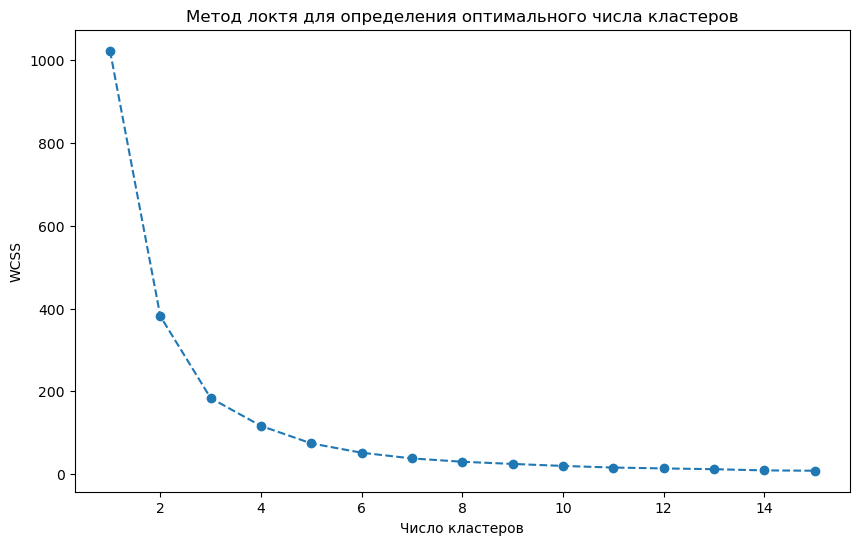

Средний коэффициент силуэта: 0.522

Средние значения по кластерам:
         Прочность при растяжении, МПа
Cluster                               
0                          1847.524741
1                          2748.538234
2                          2342.098354
3                          3261.220603


c:\Users\KABAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



In [41]:
# Выберем признаки для кластеризации 
cluster_features = ['Прочность при растяжении, МПа']

# Масштабируем данные (K-means чувствителен к масштабу)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean[cluster_features])

# Определяем оптимальное число кластеров методом "локтя"
wcss = []  # Within-Cluster-Sum-of-Squares
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Визуализация метода локтя
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), wcss, marker='o', linestyle='--')
plt.title('Метод локтя для определения оптимального числа кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('WCSS')
plt.show()

# Выбираем оптимальное число кластеров (например, 3)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Добавляем метки кластеров в DataFrame
df_clean['Cluster'] = clusters

# Оценка качества кластеризации
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"Средний коэффициент силуэта: {silhouette_avg:.3f}")

# Анализ характеристик кластеров
cluster_stats = df_clean.groupby('Cluster')[cluster_features].mean()
print("\nСредние значения по кластерам:")
print(cluster_stats)

#### - Кластеризация DBSCAN для нового признака.

In [42]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(scaled_data)

# Добавляем метки в DataFrame
df_clean['Cluster_DBSCAN'] = clusters_dbscan

# Количество кластеров (шум помечен как -1)
n_clusters = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
print(f"DBSCAN обнаружил {n_clusters} кластеров")

DBSCAN обнаружил 1 кластеров


In [43]:
df_clean['Cluster'] = clusters

# 3. Если нужно сохранить информацию о кластерах в исходных данных:
# Создаем столбец в исходных данных и заполняем NaN
X_full['Cluster'] = np.nan

# Заполняем кластеры только для строк, оставшихся после очистки
X_full.loc[df_clean.index, 'Cluster'] = clusters

# Проверяем результат
print(f"Размер X_full: {len(X_full)}")
print(f"Размер df_clean: {len(df_clean)}")
print(f"Уникальные кластеры: {X_full['Cluster'].unique()}")

Размер X_full: 1023
Размер df_clean: 1023
Уникальные кластеры: [1. 0. 2. 3.]


#### - Подготовка данных для второй модели.

In [44]:
# Просто работаем с df_clean, который уже содержит кластеры
df_clean['Cluster'] = clusters

# Теперь можно использовать df_clean для дальнейшего анализа
X = df_clean.drop(['Прочность при растяжении, МПа'], axis=1)
y = df_clean['Прочность при растяжении, МПа']

#### - Разделение данных для второй модели.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

#### - Проверка данных.

In [46]:
print(len(X_train.columns), len(X_train_val.columns))
X_train.head()

14 14


Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
ID                                                                              
604                         3.578784       1862.679792             341.672132   
227                         2.927797       2006.130229             950.619006   
970                         2.279886       1946.473054            1008.415902   
497                         3.016343       2079.295010            1122.119595   
919                         2.030340       1960.657425             914.439785   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
ID                                                                  
604                    75.068600                        25.956842   
227                   154.668800                        24.180832   
970                   151.684921                        23.267756   
497                   105.588808                        25.181815   
919                   119.615352                        23.325002   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
ID                                                             
604                312.790306                       9.046203   
227                295.136522                     710.118283   
970                293.317127                     282.038385   
497                268.548003                     292.979124   
919                227.147788                      86.252875   

     Модуль упругости при растяжении, ГПа  Потребление смолы, г/м2  \
ID                                                                   
604                             73.006935               160.519027   
227                             69.215144               142.512092   
970                             72.762976               211.029671   
497                             70.199234               166.876118   
919                             72.951915                76.023075   

     Угол нашивки, град  Шаг нашивки  Плотность нашивки  Cluster  \
ID                                                                 
604                90.0    10.264664          73.738350        0   
227                 0.0     6.625209          43.354425        0   
970                90.0     4.517337          48.264796        2   
497                 0.0     0.730260          84.015247        2   
919                90.0     6.624530          66.958941        0   

     Cluster_DBSCAN  
ID                   
604               0  
227               0  
970               0  
497               0  
919               0

#### - Создание второй модели Decision Tree с другими параметрами.

In [47]:
model2 = DecisionTreeRegressor(
    max_depth=3,            # Ограничиваем глубину дерева
    min_samples_split=5,    # Минимальное число образцов для разделения узла
    random_state=42
)

#### - Оптимизация гиперпараметров с GridSearchCV.

In [ ]:
# Параметры для перебора
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Поиск по сетке
grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)
grid_search.fit(X_train, y_train)

# Лучшая модель
best_model = grid_search.best_estimator_
print(f"Лучшие параметры: {grid_search.best_params_}")

# Оценка лучшей модели
y_pred = best_model.predict(X_test)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"R²: {r2_score(y_test, y_pred):.3f}")

Лучшие параметры: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
RMSE: 164.929
R²: 0.872


#### - Обучение второй модели.

In [49]:
model2.fit(X_train_val, y_train_val)

DecisionTreeRegressor(max_depth=3, min_samples_split=5, random_state=42)

#### - Дополнительное обучение на полной выборке.

In [50]:
model2.fit(X_train, y_train) 

DecisionTreeRegressor(max_depth=3, min_samples_split=5, random_state=42)

#### - Прогнозирование второй моделью.

In [51]:
y_pred = model2.predict(X_test) 

#### - Оценка второй модели.

In [52]:
error(y_test, y_pred) 

mean_absolute_error(y_true, y_pred)=133.19991312458748
r2_score(y_true, y_pred)=0.8721450208088337
mean_squared_error(y_true, y_pred)=27201.660961716378
RMSE: 164.92926047768594


#### - Просмотр данных.

In [53]:
data_to_check = 33
print(X_train_val.iloc[data_to_check])
print()
print(y_train_val.iloc[data_to_check])

Соотношение матрица-наполнитель            2.217869
Плотность, кг/м3                        2076.522571
модуль упругости, ГПа                    177.232913
Количество отвердителя, м.%               76.946875
Содержание эпоксидных групп,%_2           21.037842
Температура вспышки, С_2                 307.301227
Поверхностная плотность, г/м2            712.637197
Модуль упругости при растяжении, ГПа      73.982966
Потребление смолы, г/м2                  189.484401
Угол нашивки, град                         0.000000
Шаг нашивки                                5.537032
Плотность нашивки                         66.848536
Cluster                                    2.000000
Cluster_DBSCAN                             0.000000
Name: 122, dtype: float64

2114.773149935


#### - Прогноз для конкретного примера.

In [54]:
model2.predict(X_test.iloc[data_to_check:data_to_check+1])

array([2342.38144708])

#### - Добавление предсказаний в DataFrame.

In [55]:
X_test.insert(0, 'pred2', y_pred) 
X_test.insert(10, 'Прочность при растяжении, МПа', y_pred)
X_test.head()

pred2  Соотношение матрица-наполнитель  Плотность, кг/м3  \
ID                                                                    
525  2745.508108                         3.790051       1962.764956   
357  2342.381447                         2.661267       1948.878616   
444  2342.381447                         3.174404       1980.823788   
31   2745.508108                         1.771436       1872.491560   
618  2745.508108                         3.276517       1911.245306   

     модуль упругости, ГПа  Количество отвердителя, м.%  \
ID                                                        
525             673.263749                    73.780951   
357             719.246538                    97.874782   
444             459.047070                    81.162535   
31              801.033883                    79.794548   
618             213.466388                    78.847811   

     Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
ID                                                               
525                        18.800746                351.088180   
357                        21.376260                273.888846   
444                        21.787358                322.371649   
31                         22.296304                340.736898   
618                        21.778934                226.990371   

     Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
ID                                                                         
525                     412.504400                             77.180805   
357                     976.777577                             77.171209   
444                     233.898871                             73.789821   
31                      864.929184                             70.947592   
618                     113.590494                             72.695218   

     Потребление смолы, г/м2  Прочность при растяжении, МПа  \
ID                                                            
525               271.263323                    2745.508108   
357               162.998234                    2342.381447   
444               200.414215                    2342.381447   
31                123.356264                    2745.508108   
618               223.770443                    2745.508108   

     Угол нашивки, град  Шаг нашивки  Плотность нашивки  Cluster  \
ID                                                                 
525                 0.0     5.333214          44.180650        1   
357                 0.0     7.358027          49.360765        2   
444                 0.0     3.717884          48.955385        2   
31                 90.0     7.000000          70.000000        1   
618                90.0     8.776210          58.450719        1   

     Cluster_DBSCAN  
ID                   
525               0  
357               0  
444               0  
31                0  
618               0

# Сохранение модели 2

#### - Сохранение второй модели.

In [56]:
with open('model2.sav', 'wb') as f:
    pickle.dump(model2, f)

#### - Загрузка второй модели.

In [57]:
with open('model2.sav', 'rb') as f: 
    model_21 = pickle.load(f)

# Нейронная сеть

#### - Функция для создания директории для настройки моделей.

In [58]:
# Создание директории для сохранения моделей
def setup_tuning_directory():
    try:
        # Создаем абсолютный путь в домашней директории пользователя
        tuning_dir = Path.home() / 'composite_materials_tuning'
        tuning_dir.mkdir(exist_ok=True)
        return str(tuning_dir)
    except Exception as e:
        print(f"Ошибка при создании директории: {e}")


#### - Функция для загрузки и подготовки данных для нейронной сети.

In [59]:
# Загрузка и подготовка данных
def load_and_prepare_data():
    input_features = [
        "Плотность, кг/м3", "модуль упругости, ГПа", 
        "Количество отвердителя, м.%", "Содержание эпоксидных групп,%_2",
        "Температура вспышки, С_2", "Поверхностная плотность, г/м2",
        "Прочность при растяжении, МПа", "Модуль упругости при растяжении, ГПа",
        "Потребление смолы, г/м2", "Угол нашивки, град", 
        "Шаг нашивки", "Плотность нашивки"
    ]
    target = 'Соотношение матрица-наполнитель'

    X = df_clean[input_features]
    y = df_clean[[target]]
    
    return X, y

#### - Функция для создания модели нейронной сети с возможностью настройки гиперпараметров.

In [60]:
# Создание модели с возможностью настройки гиперпараметров
def build_model(hp=None):
    model = keras.Sequential()
    
    # Настраиваемое количество слоев и нейронов
    if hp:
        num_layers = hp.Int('num_layers', 1, 3)
        for i in range(num_layers):
            model.add(layers.Dense(
                units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
                activation=hp.Choice('activation', ['relu', 'tanh']),
                kernel_regularizer=keras.regularizers.l2(0.01)
            ))
            model.add(layers.Dropout(
                hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
            ))
    else:
        # Значения по умолчанию
        model.add(layers.Dense(128, activation='relu', input_shape=(12,)))
        model.add(layers.Dropout(0.2))
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dropout(0.2))
    
    model.add(layers.Dense(1))
    
    optimizer = keras.optimizers.Adam(
        learning_rate=hp.Float('lr', 1e-4, 1e-2, sampling='log') if hp else 0.001
    )
    
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae', keras.metrics.MeanAbsolutePercentageError(name='mape')]
    )
    return model

#### - Функция для обучения с кросс-валидацией.

In [61]:
# Обучение с кросс-валидацией
def train_with_cv(X, y, n_splits=5, epochs=100):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    cv_scores = []
    histories = []
    
    for train_idx, val_idx in kfold.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Масштабирование
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        
        model = build_model()
        
        early_stopping = callbacks.EarlyStopping(
            patience=10,
            restore_best_weights=True
        )
        
        history = model.fit(
            X_train_scaled, y_train,
            validation_data=(X_val_scaled, y_val),
            epochs=epochs,
            batch_size=32,
            callbacks=[early_stopping],
            verbose=0
        )
        
        val_loss, val_mae, val_mape = model.evaluate(X_val_scaled, y_val, verbose=0)
        cv_scores.append(val_mae)
        histories.append(history)
    
    return cv_scores, histories

#### - Основная функция для выполнения всего пайплайна нейронной сети.

Trial 90 Complete [00h 00m 09s]
val_loss: 4.350870132446289

Best val_loss So Far: 0.8086298704147339
Total elapsed time: 00h 05m 15s


c:\Users\KABAN\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8753 - mae: 0.7737 - mape: 29.7758  
Test MAE: 0.7989
Test MAPE: 30.91%
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


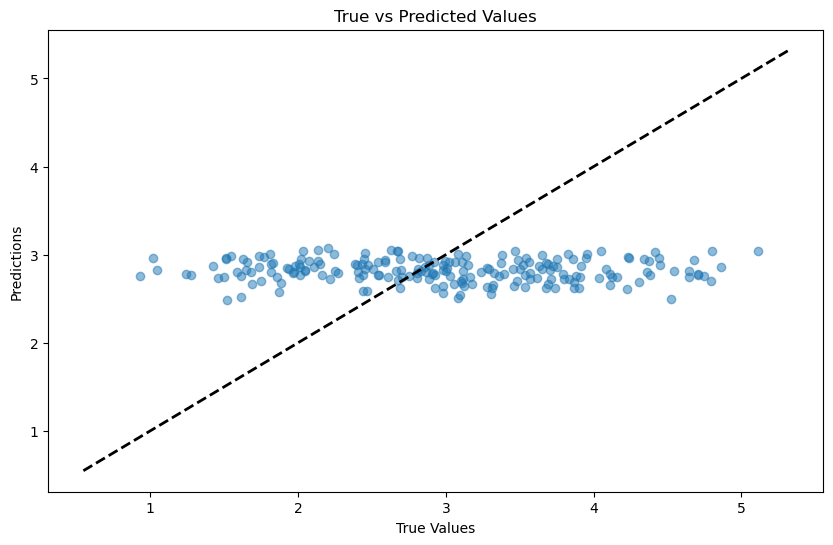

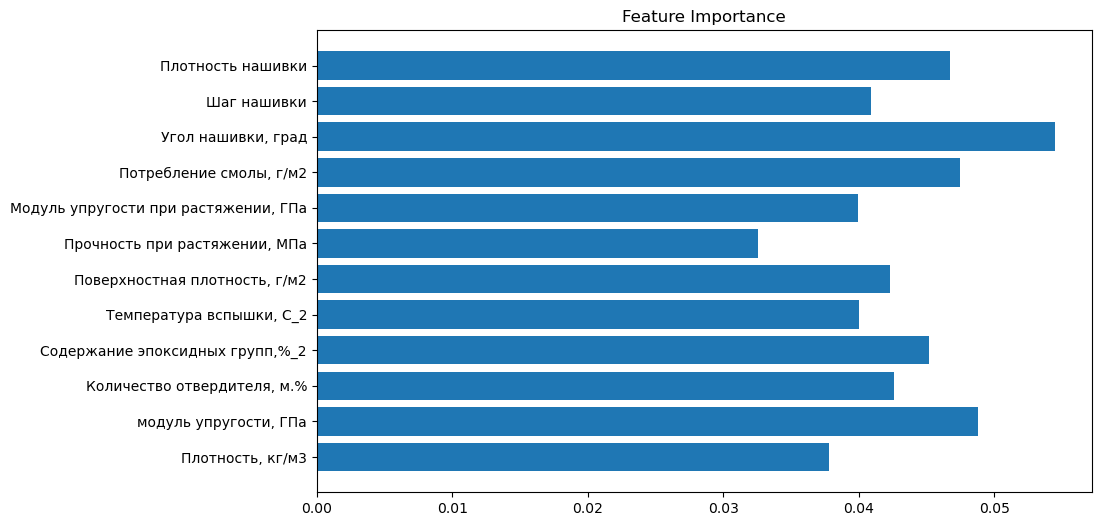

In [62]:
# Основной блок выполнения
def main():
    # Загрузка данных
    X, y = load_and_prepare_data()
    
    # Кросс-валидация
    cv_scores, histories = train_with_cv(X, y)
    print(f"Average CV MAE: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
    
    # Окончательное обучение на всех данных
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Подбор гиперпараметров (опционально)
    tuner = Hyperband(
        build_model,
        objective='val_loss',
        max_epochs=50,
        directory='tuning',
        project_name='composite_materials',
        overwrite=True
    )
    
    tuner.search(
        X_train_scaled, y_train,
        validation_split=0.2,
        epochs=50,
        callbacks=[callbacks.EarlyStopping(patience=5)]
    )
    
    # Лучшая модель
    best_model = tuner.get_best_models(num_models=1)[0]
    
    # Оценка на тестовых данных
    test_loss, test_mae, test_mape = best_model.evaluate(X_test_scaled, y_test)
    print(f"Test MAE: {test_mae:.4f}")
    print(f"Test MAPE: {test_mape:.2f}%")
    
    # Прогнозирование
    y_pred = best_model.predict(X_test_scaled)
    
    # Визуализация результатов
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('True vs Predicted Values')
    plt.show()
    
    # Сохранение модели
    best_model.save('best_composite_model.keras')
    
    # Важность признаков (пример)
    feature_importance = np.abs(best_model.layers[0].get_weights()[0]).mean(axis=1)
    plt.figure(figsize=(10, 6))
    plt.barh(X.columns, feature_importance)
    plt.title('Feature Importance')
    plt.show()

if __name__ == "__main__":
    main()

#### - Функции для расчета и вывода метрик регрессии.

In [63]:
def calculate_regression_metrics(y_true, y_pred):
    metrics = {
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2': r2_score(y_true, y_pred),
        'MAPE (%)': mean_absolute_percentage_error(y_true, y_pred) * 100
    }
    return metrics

def print_metrics_table(metrics):
    """"""
    print("\nРегрессионные метрики:")
    print("{:<20} {:<10}".format('Метрика', 'Значение'))
    print("-" * 30)
    for name, value in metrics.items():
        print("{:<20} {:<10.4f}".format(name, value))

if __name__ == "__main__":
    
    
    y_true = df_clean['Соотношение матрица-наполнитель'].values
    y_pred = df_clean['Соотношение матрица-наполнитель'].values * 0.95
    
    # Вычисление метрик
    metrics = calculate_regression_metrics(y_true, y_pred)
    
    # Вывод результатов
    print_metrics_table(metrics)


Регрессионные метрики:
Метрика              Значение  
------------------------------
MAE                  0.1463    
MSE                  0.0234    
RMSE                 0.1529    
R2                   0.9706    
MAPE (%)             5.0000    


In [64]:
model = keras.models.load_model('best_composite_model.keras')
model.summary()

c:\Users\KABAN\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,693 (10.52 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,796 (7.02 KB)

In [65]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
